In [1]:
#All finalised needed imports
import pandas as pd
import itertools
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

Import Data and set X to features and Y to target data

In [2]:
data = pd.read_csv('heart.csv')
data = data[data['Oldpeak'] >= 0]
features = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG',
            'MaxHR','ExerciseAngina','Oldpeak','ST_Slope'] 
X = data[features]

target = 'HeartDisease'
Y = data[target]

convert string types to numerical

In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() 
X['Sex'] = le.fit_transform(X['Sex'])
X['ChestPainType'] = le.fit_transform(X['ChestPainType'])
X['RestingECG'] = le.fit_transform(X['RestingECG'])
X['ExerciseAngina'] = le.fit_transform(X['ExerciseAngina'])
X['ST_Slope'] = le.fit_transform(X['ST_Slope'])

Create training and testing variables

In [4]:
from sklearn.model_selection import train_test_split
random_state=0
test_size=0.25
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = test_size, random_state = random_state)

In [5]:
X_train.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
count,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000
mean,53.519174,0.794985,0.783186,132.637168,204.986726,0.222714,0.977876,138.029499,0.411504,0.909145,1.370206
std,9.345909,0.404010,0.962463,18.385449,104.890270,0.416375,0.639271,25.465052,0.492470,1.034803,0.597976
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000
25%,47.250000,1.000000,0.000000,120.000000,182.000000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000
50%,54.000000,1.000000,0.000000,130.000000,224.000000,0.000000,1.000000,140.000000,0.000000,0.600000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,268.000000,0.000000,1.000000,157.750000,1.000000,1.500000,2.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000


In [6]:
X_test.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,53.563877,0.762115,0.762115,132.726872,190.995595,0.242291,1.004405,133.881057,0.392070,0.929515,1.339207
std,9.684360,0.426730,0.929255,18.791010,115.367995,0.429416,0.606001,24.718753,0.489291,1.084591,0.627120
min,30.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,158.500000,0.000000,1.000000,118.000000,0.000000,0.000000,1.000000
50%,54.000000,1.000000,0.000000,130.000000,220.000000,0.000000,1.000000,131.000000,0.000000,0.700000,1.000000
75%,61.000000,1.000000,2.000000,143.000000,264.000000,0.000000,1.000000,151.000000,1.000000,1.500000,2.000000
max,75.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,194.000000,1.000000,6.200000,2.000000


Standardize the variables

In [7]:
#from sklearn.preprocessing import StandardScaler
#scale = StandardScaler()
#scale.fit(X)
#X_train = scale.transform(X_train)
#X_test = scale.transform(X_test)

Check Model Assumptions that all features in the data are independant of eachother

In [8]:
#Some intialisations

columns = features +[target]
nColumns = len(columns)

result = pd.DataFrame(np.zeros((nColumns, nColumns)), columns=columns)

train = X_train.copy()
train[target]= Y_train

In [9]:
from scipy.stats.stats import pearsonr
# Apply Pearson correlation on each pair of features.
for col_a in range(nColumns):
    for col_b in range(nColumns):
        result.iloc[[col_a], [col_b]] = round(pearsonr(train.loc[:, columns[col_a]], train.loc[:,  columns[col_b]])[0],2)

In [10]:
def findsubsets(S,k):
    return set(itertools.combinations(S, k))

In [11]:
def printFeatureWeights(f, w):
  for idx in range(len(f)):
    print('%s : %f' % (f[idx], w[idx]))

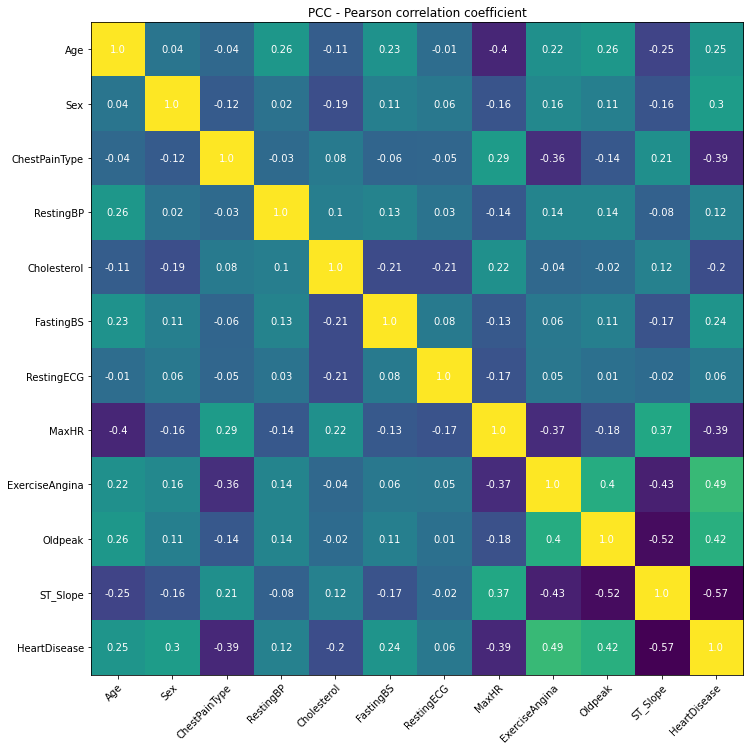

In [12]:
fig, ax = plt.subplots(figsize=(12,12))
im = ax.imshow(result)

#,yticklabels=columns, vmin=-1, vmax=1, annot=True, fmt='.2f', linewidths=.2)

# We want to show all ticks...
ax.set_xticks(np.arange(nColumns))
ax.set_yticks(np.arange(nColumns))

# ... and label them with the respective list entries
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(nColumns):
    for j in range(nColumns):
        text = ax.text(j, i, result.iloc[i, j],ha="center", va="center", color="w")
                   
ax.set_title('PCC - Pearson correlation coefficient')
plt.show()

Check Distribution of variables

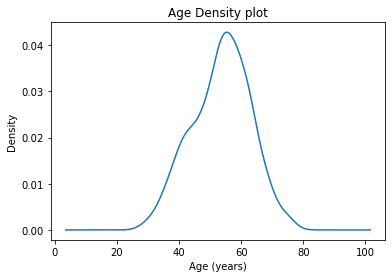

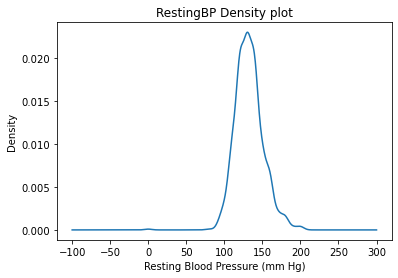

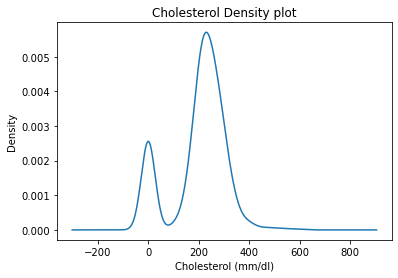

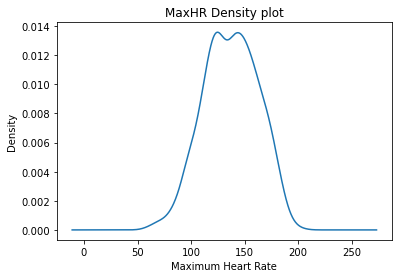

In [13]:
X['Age'].plot.density()
plt.title("Age Density plot")
plt.xlabel("Age (years)")
plt.show()
X['RestingBP'].plot.density()
plt.title("RestingBP Density plot")
plt.xlabel("Resting Blood Pressure (mm Hg)")
plt.show()
X['Cholesterol'].plot.density()
plt.title("Cholesterol Density plot")
plt.xlabel("Cholesterol (mm/dl)")
plt.show()
X['MaxHR'].plot.density()
plt.title("MaxHR Density plot")
plt.xlabel("Maximum Heart Rate")
plt.show()

In [14]:
def printFeatureWeights(f, w):
  for idx in range(len(f)):
    print('%s : %f' % (f[idx], w[idx]))

In [16]:
logReg = linear_model.LogisticRegression()
score = cross_val_score(logReg, X_train, Y_train, cv = 10)
print("Full model cross Val score: " + str(np.mean(score)))
logReg.fit(X_train,Y_train)
print("Testing accuracy: " + str(logReg.score(X_test,Y_test)))

Full model cross Val score: 0.8437225636523266
Testing accuracy: 0.8634361233480177


('Sex', 'ChestPainType', 'Cholesterol', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'Oldpeak', 'ST_Slope')
HighestAccuracy: 0.8540386303775243


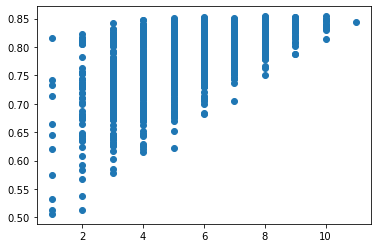

0.8590308370044053
Sex : 1.392143
ChestPainType : -0.742250
Cholesterol : -0.002202
FastingBS : 0.806763
RestingECG : 0.020299
ExerciseAngina : 1.004291
Oldpeak : 0.473784
ST_Slope : -1.823016


In [19]:
highestScore = 0
subSetMax = set()
scoresList = []
subsetSize = []
logReg = linear_model.LogisticRegression()
for j in range(1,12):
    subsets = findsubsets(features, j)
    for i in subsets:
        score = cross_val_score(logReg, X_train[list(i)], Y_train, cv = 10)
        scoresList.append(np.mean(score))
        subsetSize.append(j)
        if(np.mean(score) > highestScore):
            highestScore = np.mean(score)
            subSetMax = i
print(subSetMax)
print("HighestAccuracy: " + str(highestScore))
plt.scatter(subsetSize, scoresList)
plt.show()
logReg.fit(X_train[list(subSetMax)],Y_train)
print(logReg.score(X_test[list(subSetMax)],Y_test))
printFeatureWeights(list(subSetMax), logReg.coef_[0])

MAP estimator using Normal distribution for bias term

In [20]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)
temp = cross_val_score(nb,X_train,Y_train,cv=10)
print("Mean cross val score: " + str(np.mean(temp)))
Y_pred = nb.predict(X_test)

# Evaluate Accuracy
nb.score(X_test, Y_test)


Mean cross val score: 0.8421861281826162


0.8678414096916299

In [ ]:
from sklearn.preprocessing import StandardScaler
logReg = linear_model.LogisticRegression()
temp = cross_val_score(logReg,X_train,Y_train,cv=10)
print("Mean cross val score: " + str(np.mean(temp)))
logReg.fit(X_train,Y_train)
Y_pred = logReg.predict(X_test)
print("Accuracy of LogisticRegression model: " + str(logReg.score(X_test,Y_test)))
print("\nList of Features and Weights:")
printFeatureWeights(features,logReg.coef_[0])
#elasticnet gives sub 80% accuracy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)
dt.score(X_test,Y_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
testScore = []
for i in range(1,101):
    neuralNet = MLPClassifier(hidden_layer_sizes = (i,), activation = 'logistic')
    neuralNet.fit(X_train,Y_train)
    testScore.append(np.mean(cross_val_score(neuralNet,X_train,Y_train,cv=10)))
print(np.max(testScore))
best = 0
for i in range(len(testScore)):
    if testScore[i] == np.max(testScore):
        best = i
        print(i)
        

plt.plot(np.arange(start=1, stop = 101, step = 1), testScore)
plt.show()
neuralNet = MLPClassifier(hidden_layer_sizes = (best,), activation = 'logistic')
neuralNet.fit(X_train,Y_train)
Y_pred = neuralNet.predict(X_test)
print(neuralNet.score(X_test,Y_test))


In [ ]:
from sklearn.neural_network import MLPClassifier
testScore = []
for i in range(1,51):
    neuralNet = MLPClassifier(hidden_layer_sizes = (i,), activation = 'relu')
    neuralNet.fit(X_train,Y_train)
    testScore.append(np.mean(cross_val_score(neuralNet,X_train,Y_train,cv=10)))
print(np.max(testScore))
best = 0
for i in range(len(testScore)):
    if testScore[i] == np.max(testScore):
        best = i
        print(i)
        

plt.plot(np.arange(start=1, stop = 51, step = 1), testScore)
plt.show()
neuralNet = MLPClassifier(hidden_layer_sizes = (best,), activation = 'relu')
neuralNet.fit(X_train,Y_train)
Y_pred = neuralNet.predict(X_test)
print(neuralNet.score(X_test,Y_test))

In [ ]:
# doesnt work because negative values in data?
#from sklearn.naive_bayes import CategoricalNB
#categorical = CategoricalNB()
#categorical.fit(X_train,Y_train)
#Y_pred = categorical.predict(X_test)
#categorical.score(X_test,Y_test)